# Activating Your First Artificial Neuron

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

## Using a Single Neuron for Binary Classification

### Creating Dummy Data

In [2]:
# Generate 1000 demo data samples with 2 features and two centers
X, y = make_blobs(n_samples=1000,
                  centers=2,
                  n_features=2,
                  random_state=78)

In [3]:
# Transforming y to a vertical vector
y = y.reshape(-1, 1)

y.shape

(1000, 1)

In [5]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X,
                  columns=["Feature 1", "Feature 2"])

df["Target"] = y

df.head()

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

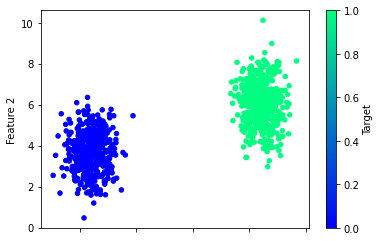

In [6]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1",
                y="Feature 2",
                c="Target",
                colormap="winter")

 ### Data Preprocessing

 Use `train_test_split` to create training and testing data.

In [7]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)

 Scale the data using the `StandarScaler`.

In [8]:
# Create scaler instance
X_scaler = StandardScaler()

In [9]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [10]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 ### Neural Network Model Creation

In [11]:
# Create a sequential model
neuron = Sequential()

The initial step is to add the first layer of our neural network.

![First Layer](../Images/tensorflow-neuron-layer-1.png)

In [12]:
# First layer
number_input = 2

number_hidden_nodes = 1

neuron.add(Dense(units=number_hidden_nodes,
                 activation="relu",
                 input_dim=number_input))

We finish creating our neural network by adding the output layer.

![Output layer](../Images/tensorflow-neuron-output-layer.png)

In [13]:
# Output layer
number_classes = 1

neuron.add(Dense(units=number_classes,
                 activation="sigmoid"))

In [14]:
# Model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


 ### Compile the Model

In [16]:
# Compile model
neuron.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

 ### Fit the Model

In [18]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled,
                   y_train,
                   epochs=100)

Epoch 1/100
24/24 [==============================] - 4s 5ms/step - loss: 0.9248 - accuracy: 0.1693
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9001 - accuracy: 0.0267
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8779 - accuracy: 0.0413
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8585 - accuracy: 0.0560
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8414 - accuracy: 0.0760
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8262 - accuracy: 0.1040
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8132 - accuracy: 0.1213
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8021 - accuracy: 0.1440
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7923 - accuracy: 0.1573
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7835 - accuracy: 0.1733
Epoch 11/

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

In [22]:
# Create a dataframe with the history dictionary
df = pd.DataFrame(model.history,
                  index=range(1, len(model.history["loss"]) + 1))

df.head()

,loss,accuracy
1,0.924816,0.169333
2,0.900099,0.026667
3,0.877878,0.041333
4,0.858494,0.056000
5,0.841359,0.076000


<AxesSubplot:>

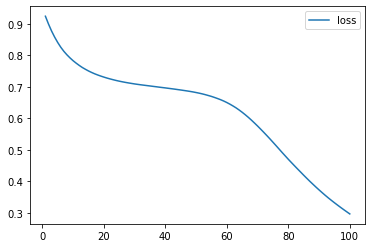

In [21]:
# Plot the loss
df.plot(y="loss")

<AxesSubplot:>

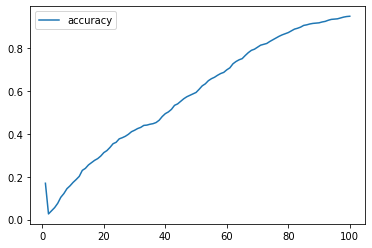

In [20]:
# Plot the accuracy
df.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [23]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled,
                                             y_test,
                                             verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2794 - accuracy: 0.9400
Loss: 0.27940282225608826, Accuracy: 0.9399999976158142


 ### Making Predictions with New Data

In [24]:
# Create 10 new samples of dummy data
new_x, new_y = make_blobs(n_samples=10,
                          centers=2,
                          n_features=2,
                          random_state=78)

In [26]:
# Making predictions
predictions = neuron.predict_classes(new_x)

results = pd.DataFrame({"predictions": predictions.ravel(),
                        "actual": new_y})

results.head()

,predictions,actual
0,1,0
1,1,1
2,1,0
3,1,1
4,1,0


 ## Using a Single Neuron for Non-Linear Data

 ### Creating Demo Data

In [27]:
# Creating dummy non-linear data
X_moons, y_moons = make_moons(n_samples=1000,
                              noise=0.08,
                              random_state=78)

In [28]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

In [29]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons,
                        columns=["Feature 1", "Feature 2"])

df_moons["Target"] = y_moons

df_moons.head()

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

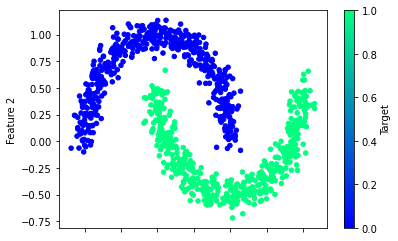

In [30]:
# Plotting the non-linear dummy data
df_moons.plot.scatter(x="Feature 1",
                      y="Feature 2",
                      c="Target",
                      colormap="winter")

 ### Data Preprocessing

 Use `train_test_split` to create training and testing data.

In [31]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons,
                                                                        y_moons, 
                                                                        random_state=78)

 Scale the data

In [32]:
# Create the scaler instance
X_moon_scaler = StandardScaler()

In [33]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler()

In [34]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)

X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

 ### Fit the Model

In [35]:
# Training the model with the non-linear data
model_moon = neuron.fit(X_moon_train_scaled,
                        y_moon_train,
                        epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 6ms/step - loss: 1.4531 - accuracy: 0.2293
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3069 - accuracy: 0.2333
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1969 - accuracy: 0.2493
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1217 - accuracy: 0.2507
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0659 - accuracy: 0.2600
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0219 - accuracy: 0.2653
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9864 - accuracy: 0.2720
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9568 - accuracy: 0.2853
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9327 - accuracy: 0.2933
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9109 - accuracy: 0.2973
Epoch 11/

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

In [36]:
# Create a dataframe with the history dictionary
df_moon = pd.DataFrame(model_moon.history,
                       index=range(1, len(model_moon.history["loss"]) + 1))

df_moon.head()

,loss,accuracy
1,1.453089,0.229333
2,1.306901,0.233333
3,1.196943,0.249333
4,1.121684,0.250667
5,1.065897,0.260000


<AxesSubplot:>

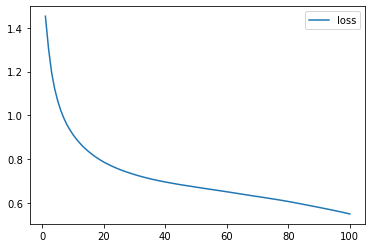

In [37]:
# Plot the loss
df_moon.plot(y="loss")

<AxesSubplot:>

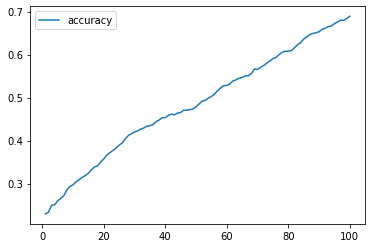

In [38]:
# Plot the accuracy
df_moon.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [39]:
# Evaluate the model using non-linear data
model_moon_loss, model_moon_accuracy = neuron.evaluate(X_moon_test_scaled,
                                                       y_moon_test,
                                                       verbose=2)

print(f"Loss: {model_moon_loss}, Accuracy: {model_moon_accuracy}")

8/8 - 0s - loss: 0.5753 - accuracy: 0.7080
Loss: 0.5753106474876404, Accuracy: 0.7080000042915344


 ### Making Predictions

In [40]:
# Create demo data
X_new_moons, y_new_moons = make_moons(n_samples=10,
                                      noise=0.08,
                                      random_state=78)

In [41]:
# Making predictions
# @NOTE: ravel is needed to flatten the data again. You can read more about that at https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
predictions_moon = neuron.predict_classes(X_new_moons)

results = pd.DataFrame({"Predictions": predictions_moon.ravel(),
                        "Actual": y_new_moons})

results.head(10)

C:\Users\TribThapa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Predictions,Actual
0,0,0
1,1,0
2,0,0
3,1,1
4,1,1
5,1,0
6,1,0
7,1,1
8,1,1
9,1,1
